In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Reading data

### Genres of items, occupations of users

In [2]:
occups=pd.read_csv("ml-100k/u.occupation",sep="|",header=-1,encoding="latin-1")
print(len(occups))
occups.T

21


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,administrator,artist,doctor,educator,engineer,entertainment,executive,healthcare,homemaker,lawyer,...,marketing,none,other,programmer,retired,salesman,scientist,student,technician,writer


In [3]:
genres=pd.read_csv("ml-100k/u.genre",sep="|",index_col=1,header=-1)
print(len(genres))
genres=genres[0]
genres


19


1
0         unknown
1          Action
2       Adventure
3       Animation
4      Children's
5          Comedy
6           Crime
7     Documentary
8           Drama
9         Fantasy
10      Film-Noir
11         Horror
12        Musical
13        Mystery
14        Romance
15         Sci-Fi
16       Thriller
17            War
18        Western
Name: 0, dtype: object

### Users

In [4]:
users=pd.read_csv("ml-100k/u.user",sep="|",header=-1,index_col=0)
print(len(users))
users.head()

943


,1,2,3,4
0,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


### Items

In [5]:
#give name to the columns
cols=["name","date","?","link"]
cols.extend(list(genres))
cols

['name',
 'date',
 '?',
 'link',
 'unknown',
 'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [6]:
items=pd.read_csv("ml-100k/u.item",sep="|",header=-1,index_col=0,encoding="latin-1", names=cols)
print(len(items))
items

1682


,name,date,?,link,unknown,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,01-Jan-1995,NaN,http://us.imdb.com/Title?Yao+a+yao+yao+dao+wai...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
9,Dead Man Walking (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Dead%20Man%20...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,Richard III (1995),22-Jan-1996,NaN,http://us.imdb.com/M/title-exact?Richard%20III...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Ratings (Training set)

In [7]:
train1=pd.read_csv("ml-100k/u1.base",sep="\t",header=-1,encoding="latin-1",names=("user","item","rating","time"),
                  # parse_dates=[3,],date_parser=datetime.fromtimestamp
                  )
train1.head()

#import sys
#sys.getsizeof(train1)
print(train1.rating.unique())
train1.describe()

[5 3 4 1 2]


,user,item,rating,time
count,80000.00000,80000.000000,80000.000000,8.000000e+04
mean,525.16570,425.705200,3.528350,8.835645e+08
std,255.94956,331.383936,1.118565,5.318611e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,334.00000,175.000000,3.000000,8.794556e+08
50%,535.00000,321.000000,4.000000,8.828441e+08
75%,744.00000,631.000000,4.000000,8.882676e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [26]:
train1.head()

,user,item,rating,time
0,1,1,5,874965758
1,1,2,3,876893171
2,1,3,4,878542960
3,1,4,3,876893119
4,1,5,3,889751712


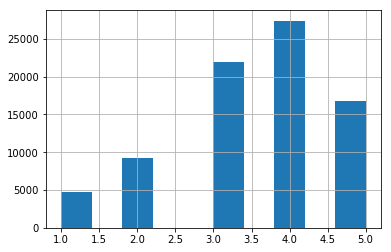

In [89]:
train1.rating.hist();

In [21]:
df=train1

### Average per user and item
I also append the average and the number of ratings to user and item dfs

In [136]:
avg_rat_item=df.groupby("item").rating.mean()
n_rat_item=df.groupby("item").rating.count()

##this is wrong, as it includes non-zero elements
#avg_rat_item=np.array(user_item.mean(axis=0))[0,:]
#avg_rat_user=np.array(user_item.mean(axis=1))[:,0]
#users["n_ratings"]=[len(r) for r in user_item.tolil().rows]
#items["n_ratings"]=[len(r) for r in user_item.T.tolil().rows]

items["avg_rating"]=avg_rat_item
items["avg_rating-avg"]=avg_rat_item-avg
items["n_ratings"]=n_rat_item

print(items.n_ratings.sum())  #sanity check
items.sort_values(by="avg_rating",ascending=False)[["name","avg_rating","avg_rating-avg", "n_ratings"]]

80000.0


,name,avg_rating,avg_rating-avg,n_ratings
1189,Prefontaine (1997),5.000000,1.471650,2.0
1653,Entertaining Angels: The Dorothy Day Story (1996),5.000000,1.471650,1.0
1599,Someone Else's America (1995),5.000000,1.471650,1.0
1500,Santa with Muscles (1996),5.000000,1.471650,1.0
1467,"Saint of Fort Washington, The (1993)",5.000000,1.471650,2.0
1201,Marlene Dietrich: Shadow and Light (1996),5.000000,1.471650,1.0
1122,They Made Me a Criminal (1939),5.000000,1.471650,1.0
1293,Star Kid (1997),5.000000,1.471650,3.0
1449,Pather Panchali (1955),4.714286,1.185936,7.0
1367,Faust (1994),4.666667,1.138317,3.0


In [43]:
avg_rat_user=df.groupby("user").rating.mean()
n_rat_user=df.groupby("user").rating.count()

users["avg_rating"]=avg_rat_user
users["avg_rating-avg"]=avg_rat_user-avg 
users["n_ratings"]=n_rat_user

print(users.n_ratings.sum())  #sanity check
users.sort_values(by="avg_rating",ascending=False)

80000


,1,2,3,4,avg_rating,avg_rating-avg,n_ratings
0,,,,,,,
849,15,F,student,25652,4.869565,1.341215,23
688,37,F,administrator,60476,4.833333,1.304983,24
225,51,F,administrator,58202,4.800000,1.271650,15
507,18,F,writer,28450,4.724138,1.195788,58
628,13,M,none,94306,4.703704,1.175354,27
928,21,M,student,55408,4.687500,1.159150,32
118,21,M,administrator,90210,4.642857,1.114507,42
427,51,M,doctor,85258,4.583333,1.054983,24
907,25,F,other,80526,4.571429,1.043079,147


### Read test set

In [48]:
test1=pd.read_csv("ml-100k/u1.test",sep="\t",header=-1,encoding="latin-1",names=("user","item","rating","time"),
                  # parse_dates=[3,],date_parser=datetime.fromtimestamp
                  )

avg_test=test1.rating.mean()
print(avg_test)
test1.head()

3.5359


,user,item,rating,time
0,1,6,5,887431973
1,1,10,3,875693118
2,1,12,5,878542960
3,1,14,5,874965706
4,1,17,3,875073198


In [51]:
df_test=test1

# Recommendation

## 1st strategy: recommend best overall items for everyone
Here I just find the movies with the highest average rating, and recommend them to everyone.

First I find the best movies

### (1a) Just rank by average rating

In [121]:
#The best n_items_rec movies
n_items_rec=10
rec_items_a=items.sort_values(by="avg_rating",ascending=False)[:n_items_rec]
rec_items_index_a=rec_items_a.index
#print(rec_items_index_a)
items.loc[rec_items_index_a][["name", "avg_rating", "n_ratings"]]

,name,avg_rating,n_ratings
1189,Prefontaine (1997),5.000000,2.0
1653,Entertaining Angels: The Dorothy Day Story (1996),5.000000,1.0
1599,Someone Else's America (1995),5.000000,1.0
1500,Santa with Muscles (1996),5.000000,1.0
1467,"Saint of Fort Washington, The (1993)",5.000000,2.0
1201,Marlene Dietrich: Shadow and Light (1996),5.000000,1.0
1122,They Made Me a Criminal (1939),5.000000,1.0
1293,Star Kid (1997),5.000000,3.0
1449,Pather Panchali (1955),4.714286,7.0
1367,Faust (1994),4.666667,3.0


These are obscure movies which got 5 by one or two users.

Let's try recommending the first 10 items of this list to the users.

In [122]:
#Example: The average rating with n_items_rec=10 suggestions per user
#here I find the recommended items in the test set
test_rec_a=df_test[df_test["item"].isin(rec_items_index_a)]
print(len(df_test),len(test_rec_a))
print("number of recommended items per users= ",n_items_rec)
print("number of suggested items= ",n_items_rec*len(users))
print("mean for the successful suggested items= ",test_rec_a.rating.mean())
print("number of successful suggested items= ",test_rec_a.rating.count())
print("number of successful suggested items per user = ",test_rec_a.rating.count()/len(users))

20000 5
number of recommended items per users=  10
number of suggested items=  9430
mean for the successful suggested items=  4.2
number of successful suggested items=  5
number of successful suggested items per user =  0.00530222693531


The average rating is good, but I only got 5 successful recommendations out of 9430, so it is probably not a good strategy

### (1b) Rank by most viewed
Let's try with the most viewed movies.

In [123]:
n_items_rec=10
rec_items_b=items.sort_values(by="n_ratings",ascending=False)[:n_items_rec]
rec_items_index_b=rec_items_b.index
#print(rec_items_index_b)
items.loc[rec_items_index_b][["name", "avg_rating","avg_rating-avg" ,"n_ratings"]]

,name,avg_rating,avg_rating-avg,n_ratings
50,Star Wars (1977),4.359504,0.831154,484.0
181,Return of the Jedi (1983),4.011848,0.483498,422.0
258,Contact (1997),3.823383,0.295033,402.0
100,Fargo (1996),4.108861,0.580511,395.0
294,Liar Liar (1997),3.164975,-0.363375,394.0
288,Scream (1996),3.445013,-0.083337,391.0
286,"English Patient, The (1996)",3.641753,0.113403,388.0
1,Toy Story (1995),3.892950,0.364600,383.0
121,Independence Day (ID4) (1996),3.390935,-0.137415,353.0
300,Air Force One (1997),3.656250,0.127900,352.0


These are well-known movies, even though some have below-par ratings (Liar Liar, Scream, ID) 

In [124]:
test_rec_b=df_test[df_test["item"].isin(rec_items_index_b)]
print(len(df_test),len(test_rec_b))
print("number of recommended items per users= ",n_items_rec)
print("number of suggested items= ",n_items_rec*len(users))
print("mean for the successful suggested items= ",test_rec_b.rating.mean())
print("number of successful suggested items= ",test_rec_b.rating.count())
print("number of successful suggested items per user = ",test_rec_b.rating.count()/len(users))

20000 899
number of recommended items per users=  10
number of suggested items=  9430
mean for the successful suggested items=  3.7853170189099
number of successful suggested items=  899
number of successful suggested items per user =  0.953340402969


Here I get an average of almost 1 useful recommendation per user, but with a lower average rating than before.

### (1c) Rank by total rating
Here I take total_rating as the sum of all ratings. It is a comprimise between quantity and quality

In [127]:
items["total_rating"]=df.groupby("item").rating.sum()

In [128]:
n_items_rec=10
rec_items_c=items.sort_values(by="total_rating",ascending=False)[:n_items_rec]
rec_items_index_c=rec_items_c.index
#print(rec_items_index_b)
items.loc[rec_items_index_c][["name", "avg_rating","avg_rating-avg" ,"n_ratings","total_rating"]]

,name,avg_rating,avg_rating-avg,n_ratings,total_rating
50,Star Wars (1977),4.359504,0.831154,484.0,2110.0
181,Return of the Jedi (1983),4.011848,0.483498,422.0,1693.0
100,Fargo (1996),4.108861,0.580511,395.0,1623.0
258,Contact (1997),3.823383,0.295033,402.0,1537.0
1,Toy Story (1995),3.892950,0.364600,383.0,1491.0
174,Raiders of the Lost Ark (1981),4.247093,0.718743,344.0,1461.0
127,"Godfather, The (1972)",4.258824,0.730474,340.0,1448.0
286,"English Patient, The (1996)",3.641753,0.113403,388.0,1413.0
288,Scream (1996),3.445013,-0.083337,391.0,1347.0
300,Air Force One (1997),3.656250,0.127900,352.0,1287.0


Here I get popular movies with good ratings, even though Scream, which is slightly below-par, is still in the top 10.

In [129]:
test_rec_c=df_test[df_test["item"].isin(rec_items_index_c)]
print(len(df_test),len(test_rec_c))
print("number of recommended items per users= ",n_items_rec)
print("number of suggested items= ",n_items_rec*len(users))
print("mean for the successful suggested items= ",test_rec_c.rating.mean())
print("number of successful suggested items= ",test_rec_c.rating.count())
print("number of successful suggested items per user = ",test_rec_c.rating.count()/len(users))

20000 881
number of recommended items per users=  10
number of suggested items=  9430
mean for the successful suggested items=  3.9580022701475595
number of successful suggested items=  881
number of successful suggested items per user =  0.934252386002


So we have slightly less successful recommendations (0.93 vs 0.95 per user), but with a somewhat higher average rating (3.96 vs 3.79)

### (1d) Rank by total ranking - avg_rating
I think another good KPI could be how many users like a movie more than the average.

So: (avg_ranking(item)-avg_ranking(all items)) * n_rankings(item)

Once again, it is a comprimise between quantity and quality, but with a stress on quality.

In [132]:
items["total_rating-avg"]=items["avg_rating-avg"]*items["n_ratings"]
#items.sort_values(by="tot_rating-avg",ascending=False)[["name","avg_rating","n_ratings","tot_rating-avg" ]]

In [134]:
n_items_rec=10
rec_items_d=items.sort_values(by="total_rating-avg",ascending=False)[:n_items_rec]
rec_items_index_d=rec_items_d.index
#print(rec_items_index_b)
items.loc[rec_items_index_d][["name", "avg_rating","avg_rating-avg" ,"n_ratings","total_rating","total_rating-avg"]]

,name,avg_rating,avg_rating-avg,n_ratings,total_rating,total_rating-avg
50,Star Wars (1977),4.359504,0.831154,484.0,2110.0,402.27860
127,"Godfather, The (1972)",4.258824,0.730474,340.0,1448.0,248.36100
174,Raiders of the Lost Ark (1981),4.247093,0.718743,344.0,1461.0,247.24760
100,Fargo (1996),4.108861,0.580511,395.0,1623.0,229.30175
318,Schindler's List (1993),4.489451,0.961101,237.0,1064.0,227.78105
98,"Silence of the Lambs, The (1991)",4.286667,0.758317,300.0,1286.0,227.49500
313,Titanic (1997),4.281588,0.753238,277.0,1186.0,208.64705
181,Return of the Jedi (1983),4.011848,0.483498,422.0,1693.0,204.03630
64,"Shawshank Redemption, The (1994)",4.417040,0.888690,223.0,985.0,198.17795
172,"Empire Strikes Back, The (1980)",4.196610,0.668260,295.0,1238.0,197.13675


This way I get reasonable results for the best movies. Star Wars has really an edge here, thanks to good rating (not the highest one, though) and a lot of views. 

Schindler's List, for example, has in principle a higher rating, but less views, so it is well behind.

By construction, we do not have items below-par in the top items.

On the opposite, this way we penalize popular items below par, which end up at the end of the list):

In [141]:
items[["name", "avg_rating","avg_rating-avg" ,"n_ratings","total_rating","total_rating-avg"]].sort_values(by="total_rating-avg",ascending=False).dropna().tail(10)

,name,avg_rating,avg_rating-avg,n_ratings,total_rating,total_rating-avg
231,Batman Returns (1992),2.666667,-0.861683,114.0,304.0,-98.23190
259,George of the Jungle (1997),2.766917,-0.761433,133.0,368.0,-101.27055
748,"Saint, The (1997)",3.121094,-0.407256,256.0,799.0,-104.25760
323,Dante's Peak (1997),3.000000,-0.528350,199.0,597.0,-105.14165
243,Jungle2Jungle (1997),2.490741,-1.037609,108.0,269.0,-112.06180
289,Evita (1996),2.961905,-0.566445,210.0,622.0,-118.95350
358,Spawn (1997),2.610687,-0.917663,131.0,342.0,-120.21385
235,Mars Attacks! (1996),2.836158,-0.692192,177.0,502.0,-122.51795
678,Volcano (1997),2.847826,-0.680524,184.0,524.0,-125.21640
294,Liar Liar (1997),3.164975,-0.363375,394.0,1247.0,-143.16990


So we find Liar Liar at the bottom, while it was in the top 10 with the total number of views.

Let's try recommending:

In [142]:
test_rec_d=df_test[df_test["item"].isin(rec_items_index_d)]
print(len(df_test),len(test_rec_d))
print("number of recommended items per users= ",n_items_rec)
print("number of suggested it§ems= ",n_items_rec*len(users))
print("mean for the successful suggested items= ",test_rec_d.rating.mean())
print("number of successful suggested items= ",test_rec_d.rating.count())
print("number of successful suggested items per user = ",test_rec_d.rating.count()/len(users))

20000 802
number of recommended items per users=  10
number of suggested it§ems=  9430
mean for the successful suggested items=  4.28428927680798
number of successful suggested items=  802
number of successful suggested items per user =  0.850477200424


Now the number of successful recommendations has dropped to 0.85 vs 0.93 per user, but the average rating has increased  from 3.96 to 4.28.

It all depends on how you want to define a good movie, so how you define your KPI (key performance indicator).

### (1a-1b-1c-1d) Plots
Let's do some plots to compare the different strategies.

For each strategy I change the number of recommended items per user, from 1 to a given maximum items_max, and collect the 4 KPIs as a function of this number; I also compare train/test.

So I have a total of 32 columns: 4 strategies (optimizing each of the KPIs), 4 KPIs and train vs test. I use a triple-index for this purpose.

As a row I will put the number of recommended items per user.

In [229]:
#rec_items_list=list(range(1,len(items)))
items_max=50
mean_train=df.rating.mean()
mean_test=df_test.rating.mean()
rec_items_list=list(range(1,items_max))
strategies=["avg_rating","n_ratings","total_rating","total_rating-avg"]
kpi=strategies
data_sets=["df","df_test"]

skd=[(s,k,d) for s in strategies for k in kpi for d in data_sets]
index = pd.MultiIndex.from_tuples(skd, names=['Strategy', 'KPI','Train/Test'])
strategy_df.index.rename("n_items",inplace=True)
#strategy_df

In [459]:
strategy_df=pd.DataFrame(columns=index,index=rec_items_list)
for s in strategies:                                       #the 4 strategies
    print("Strategy",s)
    items_sorted=items.sort_values(by=s,ascending=False)   #sort items by strategy  
    for i in rec_items_list:                               #number of items to recommend
       # print("N.Items",i)
        rec_items=items_sorted[:i]                         #choose the first i items
        rec_items_index=rec_items.index                    #get their index
        for k in kpi:                                      #the 4 kpis
            #print("kpi",k)
            for d in data_sets:                            #the train/test datasets
                #print(d)
                if (d=="df_test"):
                    rec =df_test[df_test["item"].isin(rec_items_index)]    #find them in the test set
                    d_mean=mean_train
                    length=len(df_test)
                    #print(d)
                if (d=="df"):   
                    rec=df[df["item"].isin(rec_items_index)]                #find them also in the train set 
                    d_mean=mean_test
                    length=len(df)

                if(k=="n_ratings"):       strategy_df.loc[i,(s,k,d)]=rec.rating.count()/length
                if(k=="total_rating"):    strategy_df.loc[i,(s,k,d)]=rec.rating.sum()/length
                if(k=="avg_rating"):      strategy_df.loc[i,(s,k,d)]=rec.rating.mean()
                if(k=="total_rating-avg"):  strategy_df.loc[i,(s,k,d)]=((rec.rating.mean()-d_mean)*rec.rating.count())/length



Strategy avg_rating
Strategy n_ratings
Strategy total_rating
Strategy total_rating-avg


In [460]:
strategy_df.index.rename("n_items",inplace=True)
strategy_df.index

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
            35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
           dtype='int64', name='n_items')

In [461]:
s2=strategy_df.T.unstack(level=2)
s2=s2.swaplevel(i=-2, j=-1, axis=1)
#s2.columns = s2.columns.tolist()
#s2.columns = s2.columns.get_level_values(0)
#s2.plot(subplots=True, layout=(4,4))
#s2.index= s2.index.tolist()
s_train=s2["df"].T
s_test=s2["df_test"].T
s_train.columns = s_train.columns.tolist()
s_test.columns = s_test.columns.tolist()
s_test

,"(avg_rating, avg_rating)","(avg_rating, n_ratings)","(avg_rating, total_rating)","(avg_rating, total_rating-avg)","(n_ratings, avg_rating)","(n_ratings, n_ratings)","(n_ratings, total_rating)","(n_ratings, total_rating-avg)","(total_rating, avg_rating)","(total_rating, n_ratings)","(total_rating, total_rating)","(total_rating, total_rating-avg)","(total_rating-avg, avg_rating)","(total_rating-avg, n_ratings)","(total_rating-avg, total_rating)","(total_rating-avg, total_rating-avg)"
n_items,,,,,,,,,,,,,,,,
1,5,5e-05,0.00025,7.35825e-05,4.35354,0.00495,0.02155,0.00408467,4.35354,0.00495,0.02155,0.00408467,4.35354,0.00495,0.02155,0.00408467
2,5,5e-05,0.00025,7.35825e-05,4.18478,0.0092,0.0385,0.00603918,4.18478,0.0092,0.0385,0.00603918,4.37209,0.0086,0.0376,0.00725619
3,5,5e-05,0.00025,7.35825e-05,4.01718,0.01455,0.05845,0.00711251,4.23569,0.01485,0.0629,0.010504,4.34274,0.0124,0.05385,0.0100985
4,5,0.0001,0.0005,0.000147165,4.10149,0.0202,0.08285,0.0115773,4.10149,0.0202,0.08285,0.0115773,4.33518,0.01805,0.07825,0.0145633
5,5,0.0001,0.0005,0.000147165,3.92121,0.02475,0.09705,0.00972334,4.05708,0.02365,0.09595,0.0125045,4.34123,0.0211,0.0916,0.0171518
6,5,0.0001,0.0005,0.000147165,3.84708,0.0291,0.11195,0.00927502,4.08743,0.02745,0.1122,0.0153468,4.33398,0.0256,0.11095,0.0206242
7,5,0.0001,0.0005,0.000147165,3.82963,0.03375,0.12925,0.0101682,4.12379,0.0311,0.12825,0.0185183,4.30598,0.02925,0.12595,0.0227458
8,5,0.0001,0.0005,0.000147165,3.82661,0.0372,0.14235,0.0110954,4.07133,0.03575,0.14555,0.0194115,4.26567,0.0335,0.1429,0.0247003
9,4.66667,0.00015,0.0007,0.000170748,3.81098,0.041,0.15625,0.0115876,4.00125,0.0401,0.16045,0.0189632,4.28904,0.0365,0.15655,0.0277652


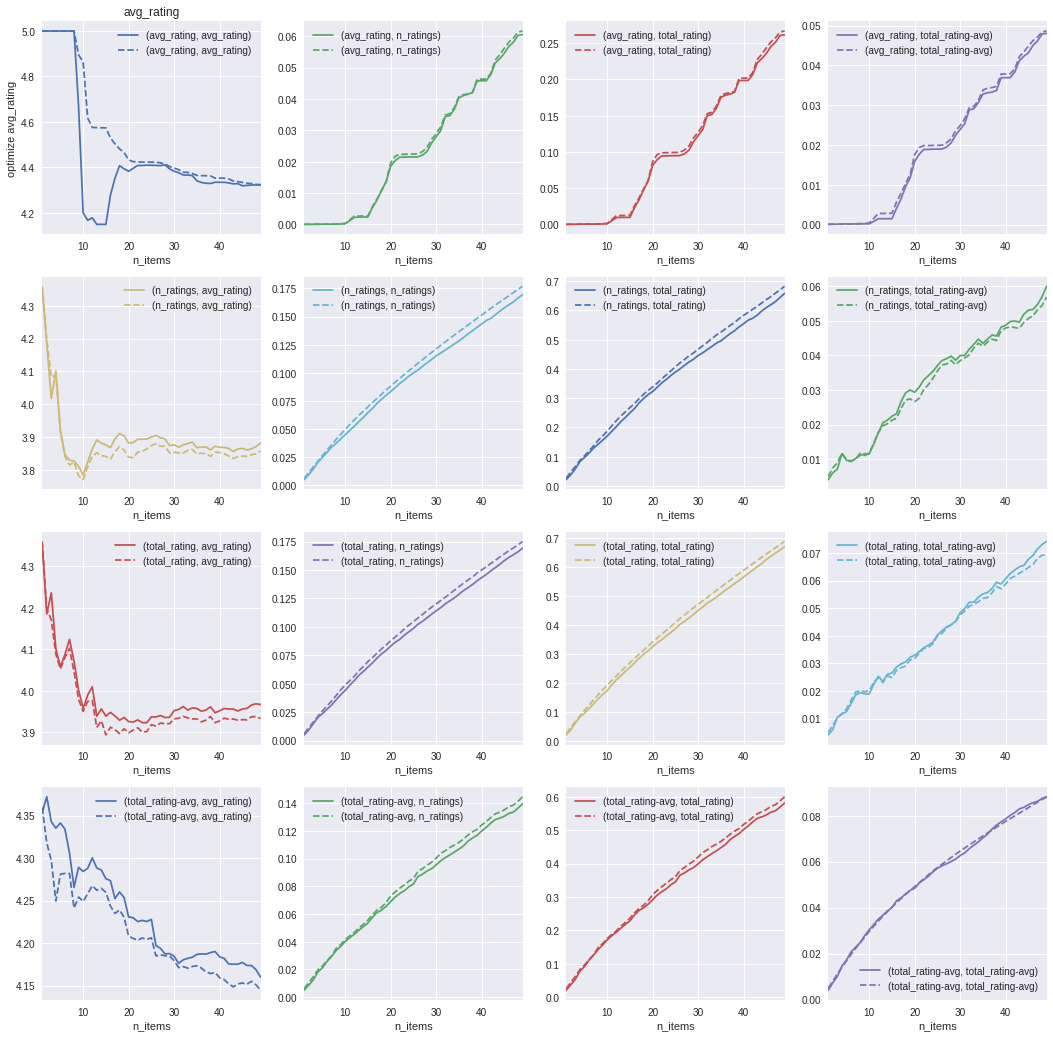

In [465]:
#strategy_df.info()
f, ax = plt.subplots(4,4,figsize=(18,18))
s_test.plot(subplots=True,figsize=(18,18),ax=ax);
s_train.plot(style="--",subplots=True,figsize=(18,18),ax=ax);
ax[0,0].set_title("avg_rating")
ax[0,0].set_ylabel("optimize avg_rating")
#strategy_df.T

In [365]:
#f, ax = plt.subplots(4,4,figsize=(25,25))
import seaborn
fg = seaborn.factorplot(y='Strategy', x='n_items',hue='Train/Test', data=strategy_df.T.unstack().T) # hue='Mean', 


ValueError: Could not interpret input 'n_items'

This works already quite well, but we can do better, and the avg rating is probably not the best KPI, since it is high even if few people follow the reccomendation

## 2nd strategy: Suggest similar items to the liked ones (same genre)
This is possible because we know a priori the genre of the movies (this is still non-collaborative).

I need two things:

- the best items per genre;
- the prefereed genre(s) of each user.

Then I recommend to each user the most popular movies of his preferred genre(s).

And I plot the average score as a function of the verified raccomendations (the ones present in the test set)/ the total possible raccomendations

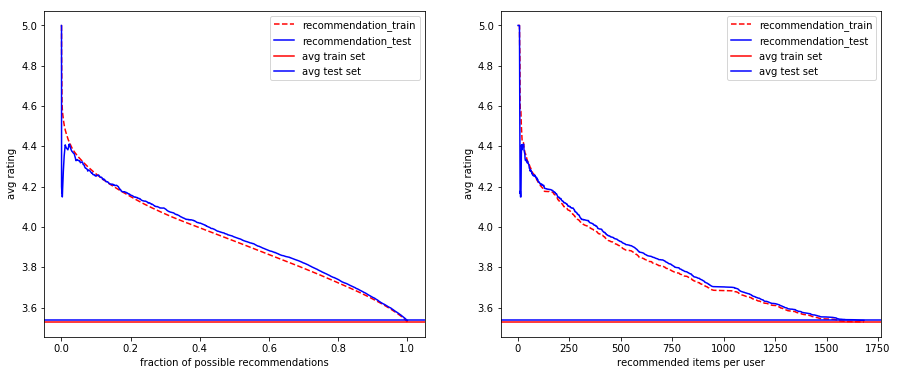

In [103]:
f, ax = plt.subplots(1,2,figsize=(15,6))

#ax[0].plot(rec_items_list,avg_rat)
#ax[0].plot(rec_items_list,np.full(len(rec_items_list),avg))
#ax[1].plot(rec_items_list,n_reccs)
ax[0].plot(np.array(n_reccs_train)/max(n_reccs_train),avg_rat_train, "r--",label="recommendation_train")
ax[0].plot(np.array(n_reccs)/max(n_reccs),avg_rat, "b", label="recommendation_test")
ax[0].axhline(avg,label="avg train set",c="r")
ax[0].axhline(avg_test,label="avg test set",c="b")
ax[0].set_xlabel("fraction of possible recommendations")
ax[0].set_ylabel("avg rating")
ax[0].legend();


ax[1].plot(np.array(rec_items_list),avg_rat_train, "r--",label="recommendation_train")
ax[1].plot(np.array(rec_items_list),avg_rat, "b",label="recommendation_test")
ax[1].axhline(avg,label="avg train set",c="r")
ax[1].axhline(avg_test,label="avg test set",c="b")
ax[1].set_xlabel("recommended items per user")
ax[1].set_ylabel("avg rating")
ax[1].legend();

In [ ]:
#list_item_genre is a list of dfs, each with items within a given genre
list_item_genre=[]
for i,g in enumerate(genres):                #loop over genres
    items_g=list(items[items[g]==1].index)        #items of selected genre
    #print(items_g)
    user_item_g=user_item.tocsc()[:,[i-1 for i in items_g]]    #reviews of the selected genre; I use csc beacuse coo is not subscriptable
    avg_rat_item_g=np.array(user_item_g.mean(axis=0))[0,:]
    items_g_df=pd.DataFrame(index=items_g,data=avg_rat_item_g,columns=["avg_rating"])
    list_item_genre.append(items_g_df.sort_values("avg_rating",ascending=False))


In [ ]:
#for example, 1 is action
items.loc[list_item_genre[1].index]

In [ ]:
#now each user gets a score of how much he likes / watches each genre

df_user_genre=pd.DataFrame()
for i,g in enumerate(genres):                     #loop over genres again
    items_g=list(items[items[g]==1].index)        #items of selected genre
    #print(items_g)
    user_item_g=user_item.tocsc()[:,[i-1 for i in items_g]]    #reviews of the selected genre; I use csc beacuse coo is not subscriptable
    avg_rat_user_g=np.array(user_item_g.mean(axis=1))[:,0]     #now I take the average rating per user!
    users_g_df=pd.DataFrame(index=users.index,data=avg_rat_user_g,columns=[g])
 #   print(users_g_df)
    df_user_genre = pd.concat([df_user_genre,users_g_df ], axis=1)
    #df_user_genre=df_user_genre.concat(users_g_df)
#items[items_g_df.index]
#items_g_df

df_user_genre

In [ ]:
#finally, I find the preferred genre of each user and suggest the best movies there

In [11]:
user_user=(user_item.dot(user_item.T)).toarray()
item_item=(user_item.T.dot(user_item)).toarray()
#user_user_n=(user_item_n.dot(user_item_n.T)).toarray()
#item_item_n=(user_item_n.T.dot(user_item_n)).toarray()

In [12]:
item_item_row_max=np.sqrt(item_item.max(axis=0))
item_item_norm=np.nan_to_num(item_item/item_item_row_max[:,np.newaxis]/item_item_row_max[np.newaxis,:])
user_user_row_max=np.sqrt(user_user.max(axis=0))
user_user_norm=np.nan_to_num(user_user/user_user_row_max[:,np.newaxis]/user_user_row_max[np.newaxis,:])


/home/baruselli/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


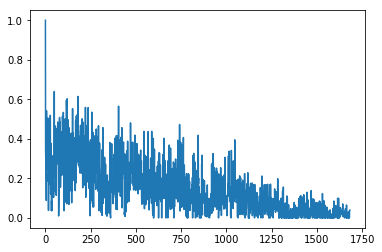

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(item_item_norm[0])

In [14]:
#from datetime import datetime
#datetime.fromtimestamp(train1.time[0])

In [15]:
sorting=item_item[0].argsort()[-10:]
items.iloc[sorting]

,name,date,?,link,unknown,Action,Adventure,Animation,Children's,Comedy,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,avg_rating,avg_rating-avg,n_ratings
237,Jerry Maguire (1996),13-Dec-1996,NaN,http://us.imdb.com/M/title-exact?Jerry%20Magui...,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1.214210,-2.314140,309
172,"Empire Strikes Back, The (1980)",01-Jan-1980,NaN,http://us.imdb.com/M/title-exact?Empire%20Stri...,0,1,1,0,0,0,...,0,0,1,1,0,1,0,1.312831,-2.215519,295
127,"Godfather, The (1972)",01-Jan-1972,NaN,"http://us.imdb.com/M/title-exact?Godfather,%20...",0,1,0,0,0,0,...,0,0,0,0,0,0,0,1.535525,-1.992825,340
117,"Rock, The (1996)",07-Jun-1996,NaN,"http://us.imdb.com/M/title-exact?Rock,%20The%2...",0,1,1,0,0,0,...,0,0,0,0,1,0,0,1.180276,-2.348074,302
121,Independence Day (ID4) (1996),03-Jul-1996,NaN,http://us.imdb.com/M/title-exact?Independence%...,0,1,0,0,0,0,...,0,0,0,1,0,1,0,1.269353,-2.258997,353
174,Raiders of the Lost Ark (1981),01-Jan-1981,NaN,http://us.imdb.com/M/title-exact?Raiders%20of%...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1.549311,-1.979039,344
100,Fargo (1996),14-Feb-1997,NaN,http://us.imdb.com/M/title-exact?Fargo%20(1996),0,0,0,0,0,0,...,0,0,0,0,1,0,0,1.721103,-1.807247,395
181,Return of the Jedi (1983),14-Mar-1997,NaN,http://us.imdb.com/M/title-exact?Return%20of%2...,0,1,1,0,0,0,...,0,0,1,1,0,1,0,1.795334,-1.733016,422
50,Star Wars (1977),01-Jan-1977,NaN,http://us.imdb.com/M/title-exact?Star%20Wars%2...,0,1,1,0,0,0,...,0,0,1,1,0,1,0,2.237540,-1.290810,484
1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,1.581124,-1.947226,383


### Build sparse matrix with ratings, dim=users * items

In [47]:
import scipy.sparse

#these are the ratings, read as a sparse matrix, with index starting from zero, hence the -1
user_item=scipy.sparse.coo_matrix((np.array(df["rating"]),(np.array(df["user"]-1),np.array(df["item"]-1))))

#these are if there is a rating
user_item_n=scipy.sparse.coo_matrix((np.ones(len(df)),(np.array(df["user"]-1),np.array(df["item"]-1))))

print(user_item.count_nonzero())
print(user_item_n.count_nonzero())
print(user_item.shape)
print(user_item_n.shape)

80000
80000
(943, 1682)
(943, 1682)
